# Análisis exploratorio.

### 1. Introducción y contexto

El análisis exploratorio de datos (EDA) tiene como objetivo entender cómo se comportan las ventas registradas en la base de datos Online Retail II de la UCI Machine Learning Repository. Con este análisis queremos identificar patrones como tendencias o estacionalidades, así como detectar posibles anomalías que podrían afectar futuros modelos de predicción. Esto nos ayudará a conocer mejor la estructura de los datos y prepararlos para análisis más avanzados.

La base de datos utilizada proviene de transacciones realizadas por una tienda en línea entre 2009 y 2011 con registros detallados por cada transacción. Para el análisis, agrupamos las ventas de forma diaria para estudiar el comportamiento general. Las unidades de medida corresponden a la cantidad de productos vendidos. La serie cubre un periodo de aproximadamente dos años, lo que permite observar variaciones a lo largo del tiempo, incluyendo posibles ciclos estacionales o eventos especiales.

El conjunto de datos completo incluye 1,044,848 registros después de combinar los datos de ambos años, proporcionando un panorama más amplio de las ventas en ese período.

Las variables principales son:

Invoice: Número de la factura que identifica cada transacción.
StockCode: Código del producto vendido.
Description: Descripción del producto.
Quantity: Cantidad de productos vendidos en cada transacción.
InvoiceDate: Fecha y hora en que se realizó la transacción.
Price: Precio unitario del producto.
Customer ID: Identificador único del cliente.
Country: País desde donde se realizó la compra.

Para el análisis exploratorio, nos enfocamos en la variable Quantity (cantidad de productos vendidos) y InvoiceDate (fecha de la transacción), agrupando los datos a nivel diario para identificar patrones en el comportamiento de las ventas a lo largo del tiempo.

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
import seaborn as sns


In [130]:
ruta = "C:/Users/ronal/Downloads/online_retail_II.xlsx"

sheets = pd.read_excel(ruta, sheet_name=None, engine="openpyxl") #Con este cpdogp se leeran todas las hojas del excel

data = pd.concat(sheets.values(), ignore_index=True) # Unir todas las hojas en un solo DataFrame

print(data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [131]:
data = data.drop_duplicates() # Al unir las hojas se duplicaron algunas filas, este codigo eliminara las filas duplicadas

## 2 Análisis preliminar

### 2.1 Inspección general

In [83]:
print('Column names:', data.columns) #Nombre de las variables

Column names: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [84]:
print('No. of rows, columns:', data.shape)#Numero de filas y columnas

No. of rows, columns: (1033036, 8)


El dataframe tiene 8 variables y 1033036 observaciones

In [85]:
print(data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [86]:
print(data.tail())

        Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                          POSTAGE         1   

                InvoiceDate  Price  Customer ID Country  
1067366 2011-12-09 12:50:00   2.10      12680.0  France  
1067367 2011-12-09 12:50:00   4.15      12680.0  France  
1067368 2011-12-09 12:50:00   4.15      12680.0  France  
1067369 2011-12-09 12:50:00   4.95      12680.0  France  
1067370 2011-12-09 12:50:00  18.00      12680.0  France  


Podemos observar que las observaciones inician el primero de enero del 2009 (01/01/2009) y finalizan el 09 de diciembre del 2011 (09/12/2011). Por tanto los datos tienen una coherencia temporal

In [87]:
print(data.isnull().sum()) #Deteccion de valores faltantes

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64


La columna Description cuenta con 4275 valores faltantes y la columna Customer ID tiene 235151.sin embargo, Descrition y Customer ID no afectan el análisis, por tanto podemos eliminar estas dos columna.

In [88]:
data2 = data.drop(columns=['Customer ID']) #Por comodidad llamaremos data2, al df al cual le eliminamos las columnas inncesarias
data2 = data2.drop(columns=['Description'])

In [89]:
print(data2.head())

  Invoice StockCode  Quantity         InvoiceDate  Price         Country
0  489434     85048        12 2009-12-01 07:45:00   6.95  United Kingdom
1  489434    79323P        12 2009-12-01 07:45:00   6.75  United Kingdom
2  489434    79323W        12 2009-12-01 07:45:00   6.75  United Kingdom
3  489434     22041        48 2009-12-01 07:45:00   2.10  United Kingdom
4  489434     21232        24 2009-12-01 07:45:00   1.25  United Kingdom


Las variables "Customer ID" y "Description" fuerine eliminadas satisfactoriamente 

### 2.2 Estadística descriptiva

El objetivo de este análisis es predecir la cantidad de compras, por tanto la estadística descriptiva se realizara en la variable Quantity (cantidad)

In [90]:
promedio = data2['Quantity'].mean()
mediana = data2['Quantity'].median()
desviacion_std = data2['Quantity'].std()
minimo = data2['Quantity'].min()
maximo = data2['Quantity'].max()
percentiles = data2['Quantity'].quantile([0.25, 0.50, 0.75])  

# Imprimir los resultados
print(f"Promedio: {promedio}")
print(f"Mediana: {mediana}")
print(f"Desviación Estándar: {desviacion_std}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Percentiles:\n{percentiles}")

Promedio: 10.076879218149223
Mediana: 3.0
Desviación Estándar: 175.19762799701013
Mínimo: -80995
Máximo: 80995
Percentiles:
0.25     1.0
0.50     3.0
0.75    10.0
Name: Quantity, dtype: float64


Podemos observar que la media de es de 10.0768, es decir, que por transacción se están vendiendo al redero de 10 artículos, sin embargo, la desviación estándar es extremadamente alto (175.1976) en comparación con la media y la mediana, lo que indica una gran variabilidad en los datos. El valor máximo es 80995 y el valor mínimo es -80995, partiendo del hecho de que los valores negativos indican devoluciones, esto quiere decir, la compra con mayor cantidad de objetos fue devuelta. La mayoría de los datos están concentrados en valores bajos, como lo muestran los percentiles: el 25% de las observaciones están por debajo de 1, el 50% por debajo de 3 y el 75% por debajo de 10. Estos resultados indican que, aunque la mayoría de las transacciones involucran cantidades pequeñas, la presencia de valores extremos distorsiona las medidas tradicionales de tendencia central.

Como nos interesa analizar el número de ventas y no el número de devoluciones, eliminaremos los valores negativos

In [91]:
data3 = data2[data2['Quantity'] > 0] # Eliminacion de valores negativos en la variable Quantity, ademas, ahora  el df se llama data3

In [92]:
print('No. of rows, columns:', data3.shape)#Numero de filas y columnas

No. of rows, columns: (1010540, 6)


Al eliminar las filas con valores negativos en la cantidad (Quantity), obtendremos 1010540 observaciones. Además, también se eliminaron las variables irrelevantes, por tanto ahora tendremos 6

In [93]:
Q1 = data3['Quantity'].quantile(0.25)  # Primer cuartil (Q1)
Q3 = data3['Quantity'].quantile(0.75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartílico

print(f"Rango Intercuartílico (IQR): {IQR}")

Rango Intercuartílico (IQR): 11.0


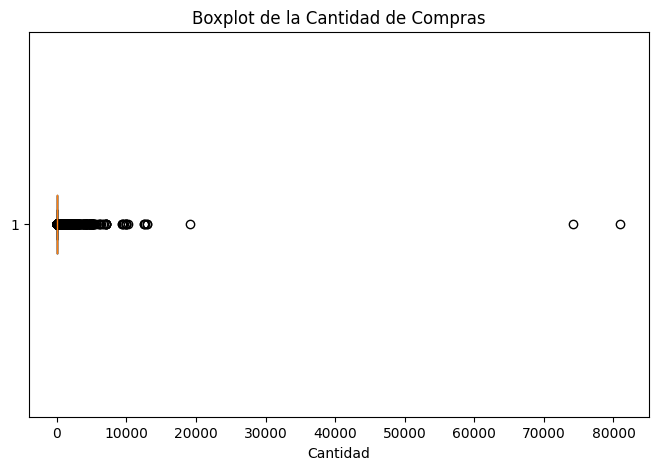

In [94]:
plt.figure(figsize=(8,5))
plt.boxplot(data3['Quantity'], vert=False)
plt.title("Boxplot de la Cantidad de Compras")
plt.xlabel("Cantidad")
plt.show()

En el Box plot se observa que la mayoria de las compras se concentran en valores pequeños, sin embarrgo la escala se ve afectada por los valores extremos (mas de 80000 compras), los cuales indican que ciertos dias se hicieron compras muy grandes

## 3 Visualizacion de la serie

### 3.1 Visualizacion temporal

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\818573956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['InvoiceDate'] = pd.to_datetime(data3['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')


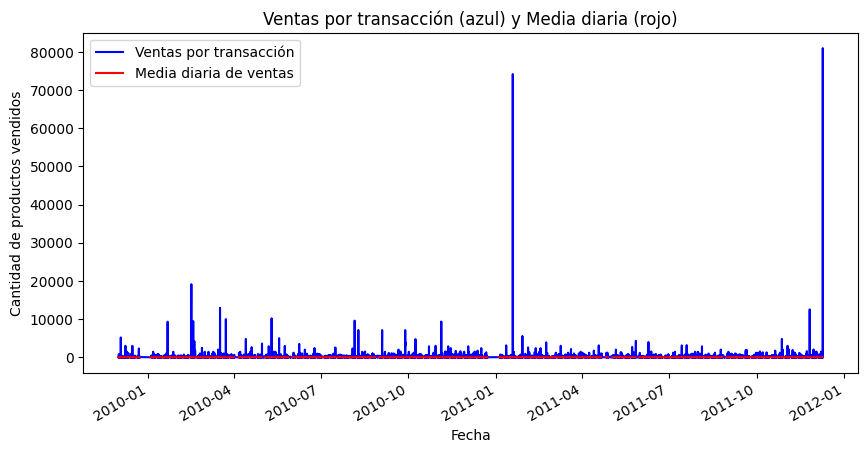

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'InvoiceDate' esté en formato datetime
data3['InvoiceDate'] = pd.to_datetime(data3['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Establecer 'InvoiceDate' como el índice del DataFrame
data3.set_index('InvoiceDate', inplace=True)

# Aplicar el remuestreo para obtener la media diaria de 'Quantity'
daily = data3['Quantity'].resample('D')
daily_mean = daily.mean()

# Visualizar la serie original (por transacción) y la media diaria
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Graficar la cantidad original (ventas por transacción)
data3['Quantity'].plot(ax=ax, color='b', label='Ventas por transacción')

# Graficar la media diaria
daily_mean.plot(ax=ax, color='r', label='Media diaria de ventas')

# Configurar el gráfico
ax.set_title('Ventas por transacción (azul) y Media diaria (rojo)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de productos vendidos')
ax.legend()

plt.show()

Las líneas azules representan las ventas por transacción, a finales del 2011 se observan picos extremos, al igual que en el boxplot, se observan compras extremadamente altas, estas compras podrían indicar errores en el registro de los datos o valores atípicos los cuales se deben analizar más a fondo. A pesar de estas fluctuaciones extremas, el comportamiento general de las ventas parece mantenerse consistente a lo largo del tiempo. Por otro lado, la línea roja, que representa la media diaria de ventas, muestra una tendencia estable y constante, lo que sugiere que, en promedio, las ventas diarias no se ven afectadas significativamente por estos eventos aislados. 

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\140281517.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ventas_por_hora = data3['Quantity'].resample('H').sum()


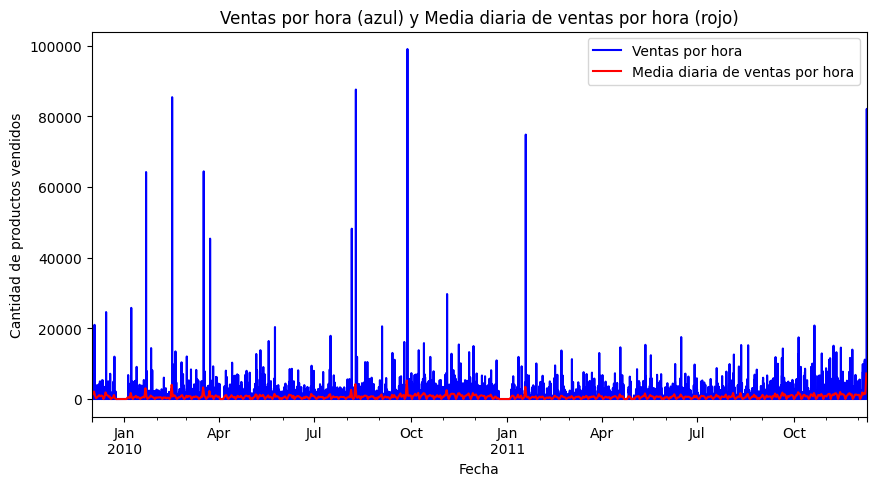

In [96]:
import matplotlib.pyplot as plt

# Remuestreo por hora para obtener la suma de ventas por hora
ventas_por_hora = data3['Quantity'].resample('H').sum()

# Calcular la media diaria de las ventas por hora
media_diaria_por_hora = ventas_por_hora.resample('D').mean()

# Visualización de las ventas por hora y su media diaria
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Graficar las ventas por hora
ventas_por_hora.plot(ax=ax, color='b', label='Ventas por hora')

# Graficar la media diaria de las ventas por hora
media_diaria_por_hora.plot(ax=ax, color='r', label='Media diaria de ventas por hora')

# Configuración del gráfico
ax.set_title('Ventas por hora (azul) y Media diaria de ventas por hora (rojo)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de productos vendidos')
ax.legend()

plt.show()


La gráfica muestra que las ventas por hora presentan alta variabilidad con picos que superan las 80,000 unidades, posiblemente debido a pedidos mayoristas, devoluciones masivas o errores de registro. Sin embargo, la media diaria de ventas por hora se mantiene estable, indicando que estas fluctuaciones extremas no afectan significativamente el comportamiento general de las ventas, que permanece uniforme a lo largo del tiempo.

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\1945956961.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensual_por_dia = ventas_por_dia.resample('M').mean()


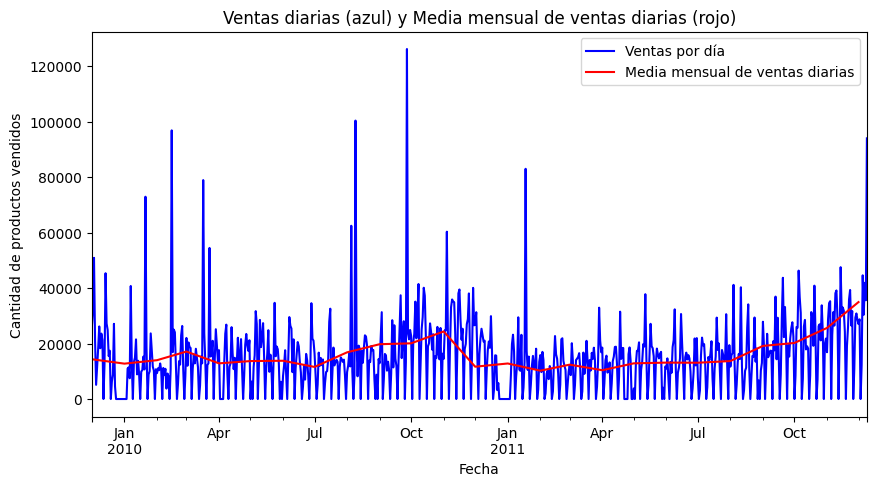

In [97]:
import matplotlib.pyplot as plt

# Remuestreo por día para obtener la suma de ventas diarias
ventas_por_dia = data3['Quantity'].resample('D').sum()

# Calcular la media mensual de las ventas diarias para suavizar la serie
media_mensual_por_dia = ventas_por_dia.resample('M').mean()

# Visualización de las ventas por día y su media mensual
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Graficar las ventas por día
ventas_por_dia.plot(ax=ax, color='b', label='Ventas por día')

# Graficar la media mensual de las ventas diarias
media_mensual_por_dia.plot(ax=ax, color='r', label='Media mensual de ventas diarias')

# Configuración del gráfico
ax.set_title('Ventas diarias (azul) y Media mensual de ventas diarias (rojo)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de productos vendidos')
ax.legend()

plt.show()


El gráfico muestra que, aunque las ventas diarias (línea azul) son muy variables con picos significativos, la media mensual (línea roja) refleja una tendencia general de crecimiento, especialmente hacia finales de 2011. Los picos podrían deberse a eventos especiales o errores en los datos, mientras que la variación mensual sugiere posibles patrones estacionales.

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\19447228.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensual_por_semana = ventas_por_semana.resample('M').mean()


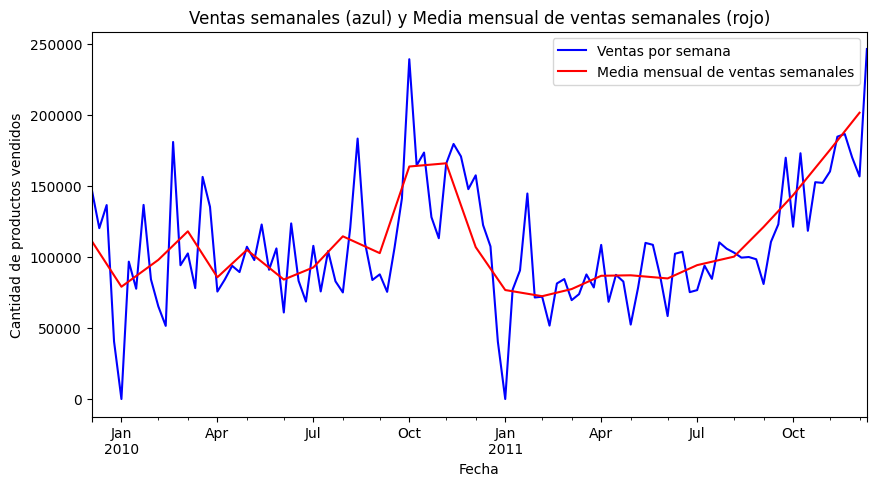

In [98]:
import matplotlib.pyplot as plt

# Remuestreo por semana para obtener la suma de ventas semanales
ventas_por_semana = data3['Quantity'].resample('W').sum()

# Calcular la media mensual de las ventas semanales para suavizar la serie
media_mensual_por_semana = ventas_por_semana.resample('M').mean()

# Visualización de las ventas por semana y su media mensual
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Graficar las ventas por semana
ventas_por_semana.plot(ax=ax, color='b', label='Ventas por semana')

# Graficar la media mensual de las ventas semanales
media_mensual_por_semana.plot(ax=ax, color='r', label='Media mensual de ventas semanales')

# Configuración del gráfico
ax.set_title('Ventas semanales (azul) y Media mensual de ventas semanales (rojo)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de productos vendidos')
ax.legend()

plt.show()


El gráfico muestra que las ventas semanales (línea azul) son inestables, con varios picos a lo largo del tiempo. Sin embargo, la media mensual (línea roja) sugiere una tendencia general al alza, especialmente a partir de mediados de 2011. Aunque hay caídas en algunos periodos, el crecimiento en las ventas es evidente hacia el final del gráfico.

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\3446522307.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_por_mes = data3['Quantity'].resample('M').sum()
C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\3446522307.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  media_trimestral_por_mes = ventas_por_mes.resample('Q').mean()


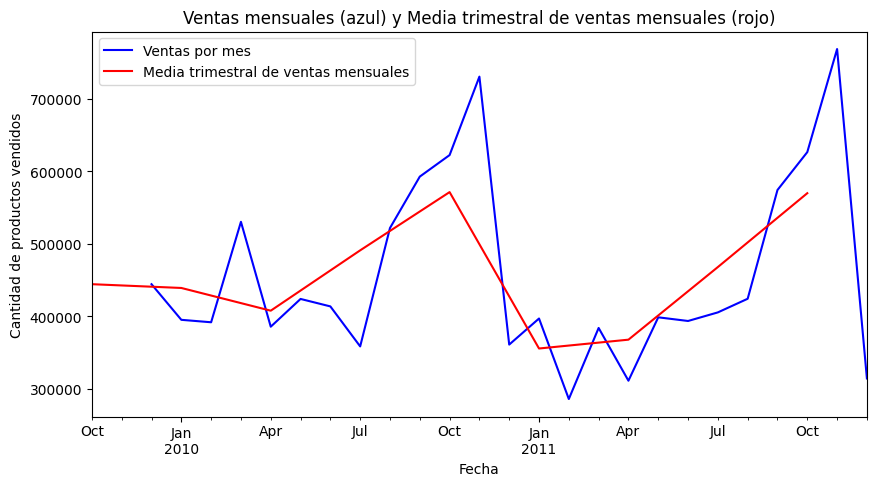

In [99]:
# Remuestreo por mes para obtener la suma de ventas mensuales
ventas_por_mes = data3['Quantity'].resample('M').sum()

# Calcular la media trimestral de las ventas mensuales para suavizar aún más la serie
media_trimestral_por_mes = ventas_por_mes.resample('Q').mean()

# Visualización de las ventas por mes y su media trimestral
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Graficar las ventas por mes
ventas_por_mes.plot(ax=ax, color='b', label='Ventas por mes')

# Graficar la media trimestral de las ventas mensuales
media_trimestral_por_mes.plot(ax=ax, color='r', label='Media trimestral de ventas mensuales')

# Configuración del gráfico
ax.set_title('Ventas mensuales (azul) y Media trimestral de ventas mensuales (rojo)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de productos vendidos')
ax.legend()

plt.show()


El gráfico muestra que las ventas mensuales (línea azul) son bastante irregulares, con picos destacados hacia finales de 2010 y 2011. Sin embargo, la media trimestral (línea roja) suaviza estas variaciones, indicando una tendencia general de crecimiento, especialmente en el segundo semestre de 2011.

### 3.2 Análisis de componentes 
#### Descomposición clásica (aditiva).

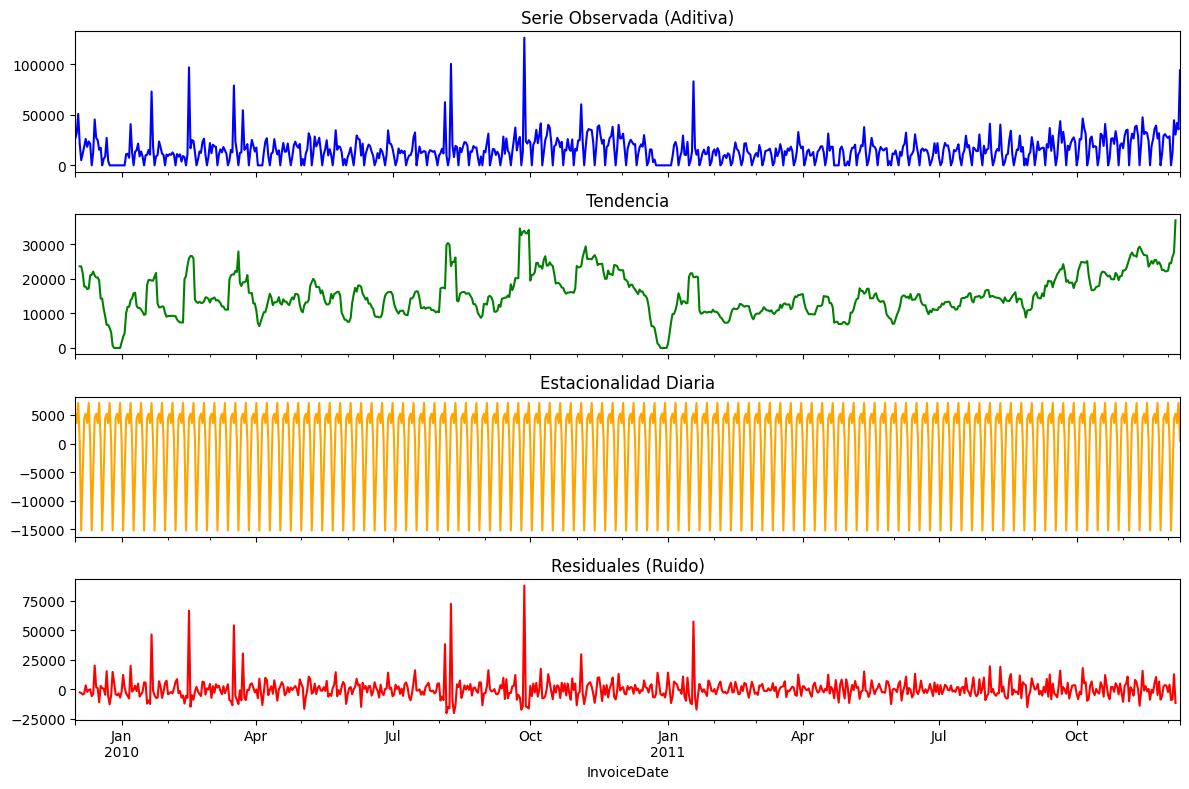

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Remuestreo por día para obtener la suma de ventas diarias
ventas_por_dia = data3['Quantity'].resample('D').sum()

# Descomposición aditiva (para patrones de magnitud constante)
descomposicion_aditiva_dia = seasonal_decompose(ventas_por_dia, model='additive', period=7)


# Visualización de la descomposición aditiva diaria
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
descomposicion_aditiva_dia.observed.plot(ax=axes[0], title='Serie Observada (Aditiva)', color='b')
descomposicion_aditiva_dia.trend.plot(ax=axes[1], title='Tendencia', color='g')
descomposicion_aditiva_dia.seasonal.plot(ax=axes[2], title='Estacionalidad Diaria', color='orange')
descomposicion_aditiva_dia.resid.plot(ax=axes[3], title='Residuales (Ruido)', color='r')
plt.tight_layout()
plt.show()




La gráfica muestra la descomposición aditiva de las ventas diarias. La primera sección es la serie original, donde se observan picos irregulares y fluctuaciones en las ventas. La segunda sección muestra la tendencia, con un incremento gradual hacia finales del periodo. La tercera sección representa la estacionalidad diaria, destacando patrones repetitivos que ocurren a lo largo de los días. Finalmente, los residuales indican el ruido o las variaciones no explicadas por la tendencia ni la estacionalidad, donde se observan algunos picos aislados que podrían deberse a eventos inusuales o errores.

p-valor de la prueba ADF en las variaciones irregulares (residuos) de la descomposición aditiva: 5.4674969170685074e-14


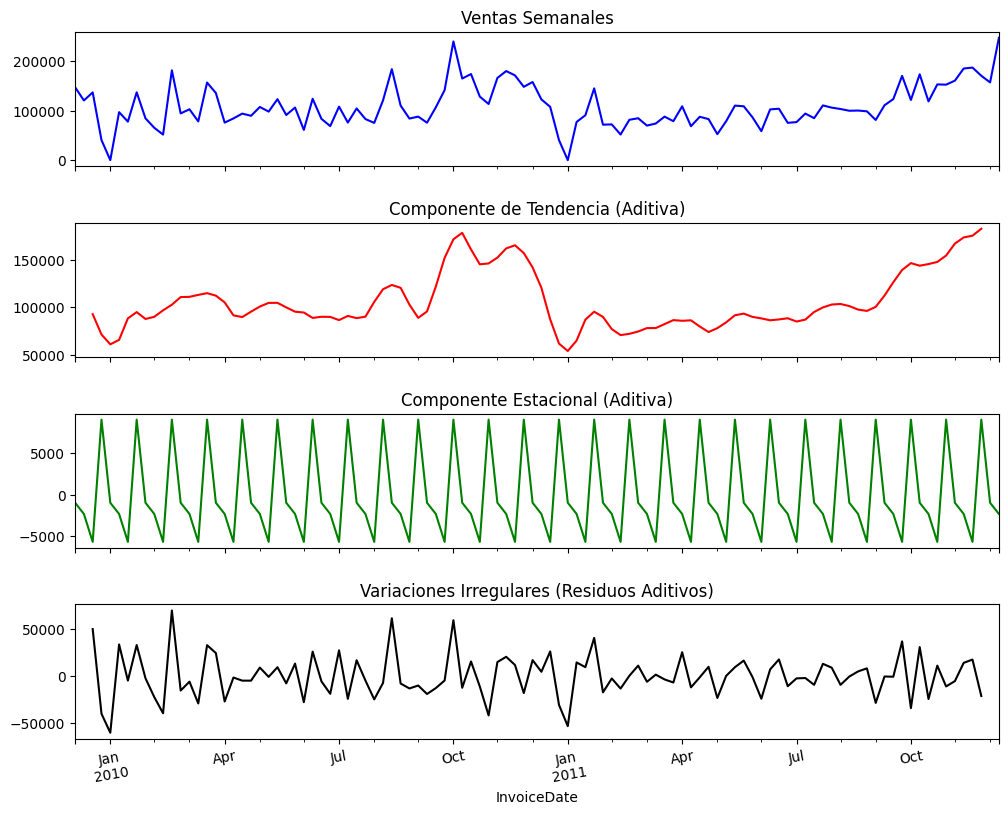

In [101]:
from statsmodels.tsa import stattools, seasonal

# Remuestreo por semana para obtener la suma de ventas semanales
ventas_semanales = data3['Quantity'].resample('W').sum()

# Descomposición aditiva (modelo clásico)
decompose_model_aditivo = seasonal.seasonal_decompose(ventas_semanales, model='additive', period=4)

# Extraer los residuos (variaciones irregulares)
irr_var_aditivo = decompose_model_aditivo.resid

# Asegurarse de que no haya valores NaN antes de la prueba ADF
irr_var_limpios = irr_var_aditivo.loc[~pd.isnull(irr_var_aditivo)]

# Aplicar la prueba ADF sobre los residuos de la descomposición aditiva
adf_result_aditivo = stattools.adfuller(irr_var_limpios, autolag='AIC')

# Imprimir el p-valor de la prueba ADF
print('p-valor de la prueba ADF en las variaciones irregulares (residuos) de la descomposición aditiva:', adf_result_aditivo[1])

# Visualización de los componentes de la descomposición aditiva
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10, 8)

ventas_semanales.plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Ventas Semanales')

decompose_model_aditivo.trend.plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Componente de Tendencia (Aditiva)')

decompose_model_aditivo.seasonal.plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Componente Estacional (Aditiva)')

decompose_model_aditivo.resid.plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Variaciones Irregulares (Residuos Aditivos)')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)
plt.show()


La gráfica muestra la descomposición aditiva de las ventas semanales. La primera parte es la serie original con fluctuaciones notables en ciertos periodos. La tendencia revela un crecimiento constante en las ventas a lo largo del tiempo, mientras que la estacionalidad semanal presenta patrones repetitivos característicos de cada semana. Por último, los residuales representan el ruido o las variaciones que no se explican por la tendencia ni la estacionalidad, donde se observan algunos picos irregulares que podrían deberse a factores externos o eventos inesperados.

En el componente de tendencia se observa un incremento inicial en las ventas seguido de un descenso alrededor de finales de 2010 y principios de 2011, posteriormente, se observa un repunte en las ventas hacia finales del período, este comportamiento sugiere que las ventas tienen ciclos de crecimiento y decrecimiento, posiblemente asociados a factores externos como campañas de marketing, cambios en la demanda estacional o fluctuaciones económicas.

El p-valor extremadamente bajo (5.47e-14) en la prueba ADF aplicada a los residuos indica que estos son altamente estacionarios. Esto confirma que la descomposición ha capturado correctamente la estructura subyacente de la serie temporal.

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\1374544941.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_por_mes = data3['Quantity'].resample('M').sum()


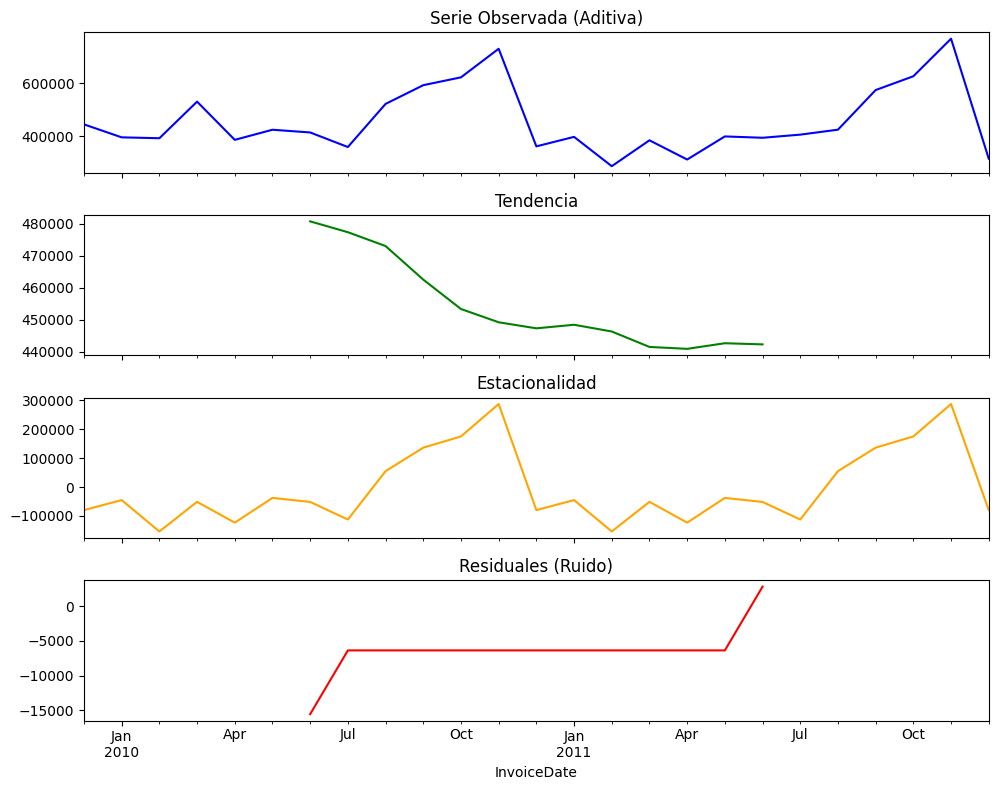

In [102]:
# Asegúrate de tener la serie temporal de ventas mensuales
ventas_por_mes = data3['Quantity'].resample('M').sum()

# Descomposición aditiva
descomposicion_aditiva = seasonal_decompose(ventas_por_mes, model='additive', period=12)

# Visualización de la descomposición aditiva
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
descomposicion_aditiva.observed.plot(ax=axes[0], title='Serie Observada (Aditiva)', color='b')
descomposicion_aditiva.trend.plot(ax=axes[1], title='Tendencia', color='g')
descomposicion_aditiva.seasonal.plot(ax=axes[2], title='Estacionalidad', color='orange')
descomposicion_aditiva.resid.plot(ax=axes[3], title='Residuales (Ruido)', color='r')
plt.tight_layout()
plt.show()


#### Descomposicion STL 

Número de valores faltantes encontrados: 0
p-valor de la prueba ADF en las variaciones diarias: 0.05337431974420152


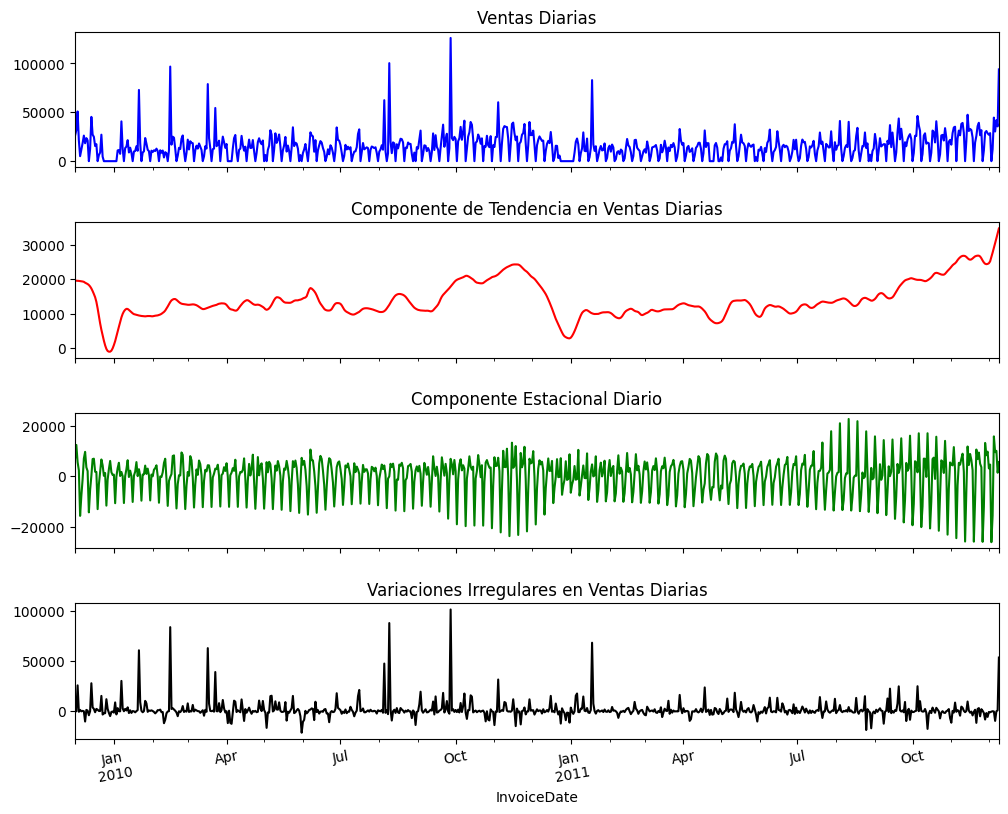

In [103]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Asegúrate de que 'InvoiceDate' esté en formato datetime y sea el índice
data3.index = pd.to_datetime(data3.index)

# Suponiendo que la columna 'Quantity' representa las ventas por transacción
# Primero agrupamos por día si los datos están a nivel de transacción para simplificar el análisis
ventas_diarias = data3['Quantity'].resample('D').sum()

# Verificar valores faltantes en la serie diaria
missing = ventas_diarias.isnull()
print('Número de valores faltantes encontrados:', missing.sum())

# Eliminar valores faltantes si existen
ventas_diarias = ventas_diarias[~missing]

# Prueba ADF para verificar estacionariedad en la serie original (diaria)
adf_result = stattools.adfuller(ventas_diarias, autolag='AIC')
print('p-valor de la prueba ADF en las variaciones diarias:', adf_result[1])

# Descomposición STL en la serie diaria (asumiendo estacionalidad semanal -> period=7)
stl_model = STL(ventas_diarias, period=7, robust=True)  # Estacionalidad semanal en datos diarios
descomposicion_stl = stl_model.fit()

# Visualización de los componentes
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10, 8)

# Serie original de ventas diarias
ventas_diarias.plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Ventas Diarias')

# Componente de tendencia
descomposicion_stl.trend.plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Componente de Tendencia en Ventas Diarias')

# Componente estacional
descomposicion_stl.seasonal.plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Componente Estacional Diario')

# Variaciones irregulares (residuos)
descomposicion_stl.resid.plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Variaciones Irregulares en Ventas Diarias')

# Ajustes de visualización
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)
plt.show()


La descomposición STL de las ventas diarias muestra que la tendencia ha tenido altibajos, con una ligera caída al inicio y un aumento hacia el final. El componente estacional refleja un patrón semanal bien definido, donde algunos días de la semana las ventas suben y otros bajan de forma constante. Las variaciones irregulares son los picos y caídas inesperadas que no se explican por la tendencia ni la estacionalidad.

El p-valor de la prueba ADF (0.053) en las variaciones diarias está justo en el límite típico de 0.05, lo que sugiere que las series no son completamente estacionarias, pero están cerca. Esto significa que podría haber cierta dependencia en el tiempo, aunque no es muy fuerte.

Número de valores faltantes encontrados: 0
p-valor de la prueba ADF en las variaciones semanales: 0.2577096513908132


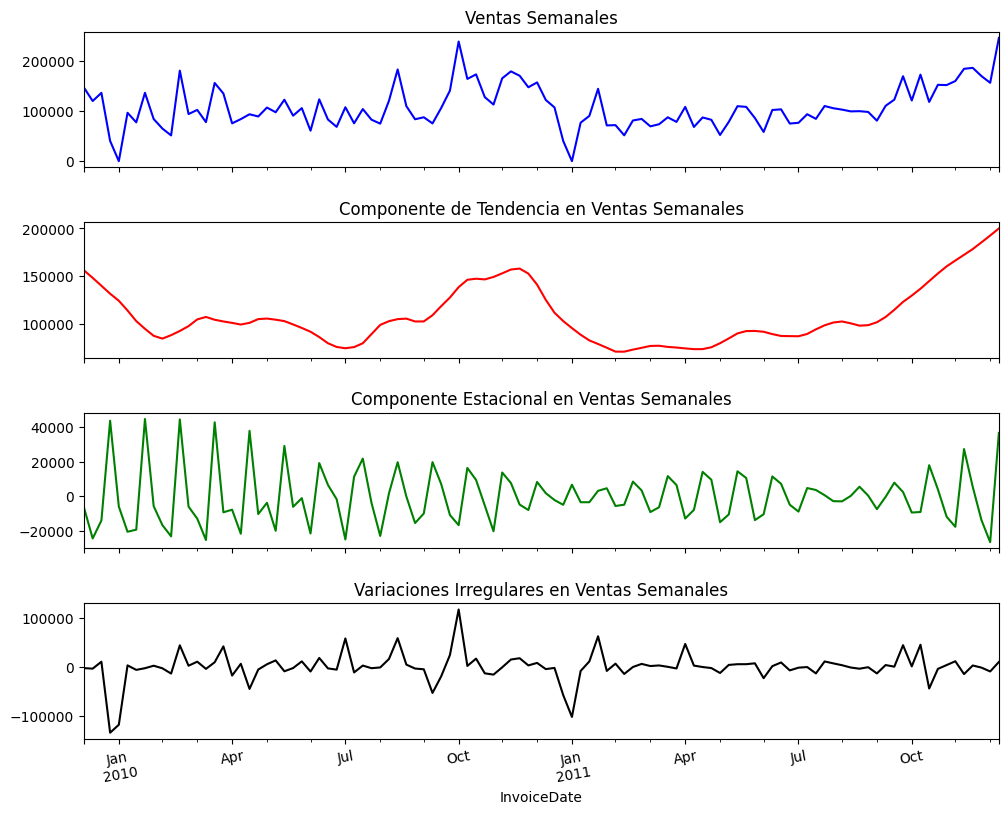

In [104]:
# Suponiendo que data3 ya está cargado y la columna 'InvoiceDate' es el índice
# Asegúrate de que 'InvoiceDate' esté en formato datetime y sea el índice
data3.index = pd.to_datetime(data3.index)

# Remuestreo por semana para obtener la suma de ventas semanales
ventas_semanales = data3['Quantity'].resample('W').sum()

# Verificar valores faltantes
missing = ventas_semanales.isnull()
print('Número de valores faltantes encontrados:', missing.sum())

# Eliminar valores faltantes si existen
ventas_semanales = ventas_semanales[~missing]

# Prueba ADF para verificar estacionariedad
adf_result = stattools.adfuller(ventas_semanales, autolag='AIC')
print('p-valor de la prueba ADF en las variaciones semanales:', adf_result[1])

# Descomposición STL semanal (suponiendo estacionalidad mensual en semanas -> period=4)
stl_model = STL(ventas_semanales, period=4, robust=True)
descomposicion_stl = stl_model.fit()

# Visualización de los componentes
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10, 8)

# Serie original de ventas semanales
ventas_semanales.plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Ventas Semanales')

# Componente de tendencia
descomposicion_stl.trend.plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Componente de Tendencia en Ventas Semanales')

# Componente estacional
descomposicion_stl.seasonal.plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Componente Estacional en Ventas Semanales')

# Variaciones irregulares (residuos)
descomposicion_stl.resid.plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Variaciones Irregulares en Ventas Semanales')

# Ajustes de visualización
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)
plt.show()


La descomposición STL de las ventas semanales muestra tres cosas importantes. La tendencia indica que las ventas bajaron al principio, pero luego empezaron a subir de forma constante. La estacionalidad muestra un patrón que se repite cada semana, lo que sugiere que hay ciertos días o semanas donde las ventas siempre suben o bajan. Finalmente, los residuales son las variaciones que no se explican ni por la tendencia ni por la estacionalidad, como picos inesperados o caídas raras en las ventas. sin embargo, 

El p-valor de la prueba ADF (0.2577) en las variaciones semanales sugiere que las series no son completamente estacionarias.

### Detección de anomalías

In [105]:
print(data3.sort_values(by="Quantity", ascending=False).head(10)) # Organiza el dataframe de mayor a menor de la variable Quantity


                    Invoice StockCode  Quantity  Price         Country
InvoiceDate                                                           
2011-12-09 09:15:00  581483     23843     80995   2.08  United Kingdom
2011-01-18 10:01:00  541431     23166     74215   1.04  United Kingdom
2010-02-15 11:57:00  497946     37410     19152   0.10         Denmark
2010-03-17 13:09:00  501534     21099     12960   0.10         Denmark
2010-03-17 13:09:00  501534     21091     12960   0.10         Denmark
2010-03-17 13:09:00  501534     21085     12744   0.10         Denmark
2011-11-25 15:57:00  578841     84826     12540   0.00  United Kingdom
2010-03-17 13:09:00  501534     21092     12480   0.10         Denmark
2010-05-10 14:55:00  507637     84016     10200   0.00  United Kingdom
2010-03-23 15:36:00  502269     21984     10000   0.25  United Kingdom


Los valores 80995 y 74125 son extremadamente altos, estas observaciones parecen ser outliers, por tanto, procederemos a liminar todos los outliers del dataframe. para determinar el método de eliminación primero debemos realizar una prueba de normalidad para muestras grandes.

In [106]:
from scipy.stats import kstest, norm

media = data3['Quantity'].mean()
desviacion = data3['Quantity'].std()

estadistico, p_valor = kstest(data3['Quantity'], 'norm', args=(media, desviacion))
print(f"Estadístico de Kolmogorov-Smirnov: {estadistico}")
print(f"P-valor: {p_valor}")

if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Estadístico de Kolmogorov-Smirnov: 0.4686654971117322
P-valor: 0.0
Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


Con un p-valor de 0.4686 se rechaza la hipotesis nula. Como los datos no siguen una distribución normal, el método apropiado para la eliminación de outliers es utilizando el rango intercuartílico. 

In [107]:
Q1 = data3['Quantity'].quantile(0.25)
Q3 = data3['Quantity'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR # definimos los límites para los valores normales


# Filtrar los datos dentro del rango aceptable
data4 = data3[(data3['Quantity'] >= limite_inferior) & (data3['Quantity'] <= limite_superior)] # realiza un filtro de los datos dentro del rango aceptable


print(data4['Quantity'].describe()) # verifica los nuevos valores mínimos y máximos

count    956871.000000
mean          5.879415
std           6.280991
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max          28.000000
Name: Quantity, dtype: float64


Al eliminar los outliers los estadisticos descriptivos de Quantity (Cantidad), son mas razonables, el promedio de compras es de 5.87 y la desviacion estandar es de 6.2 (mucho mas pequeño que el SD obtenido antes de hacer la limpieza), la dispercion se redujo mucho, por tanto, los datos son mas estables. Ademas, el rango de ventas esta entre 1 y 28.

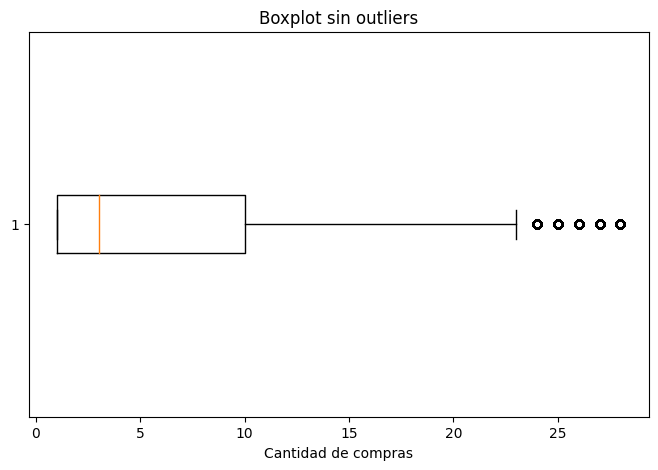

In [108]:
plt.figure(figsize=(8,5))
plt.boxplot(data4['Quantity'], vert=False)
plt.title("Boxplot sin outliers")
plt.xlabel("Cantidad de compras")
plt.show()

Aunque la distribución de la cantidad de compras parece mucho más compacta, todavía hay algunos valores fuera del límite superior, sin embargo, estos son mucho más moderados.

## 4 Estacionalidad y periodicidad

### 4.1. Análisis de patrones recurrentes

<Figure size 1000x500 with 0 Axes>

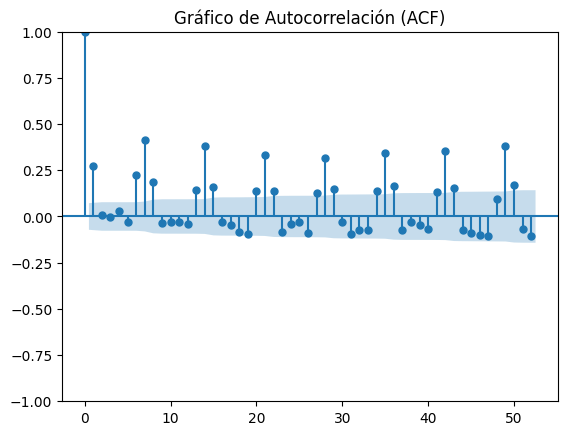

In [109]:
# Graficar la función de autocorrelación
plt.figure(figsize=(10,5))
plot_acf(ventas_diarias, lags=52)  # 
plt.title("Gráfico de Autocorrelación (ACF)")
plt.show()

El gráfico muestra poca autocorrelación después del primer punto, lo que indica que las ventas no están fuertemente relacionadas entre sí en el tiempo. Esto sugiere que es más difícil encontrar patrones claros para predecir futuras ventas.

<Figure size 1000x500 with 0 Axes>

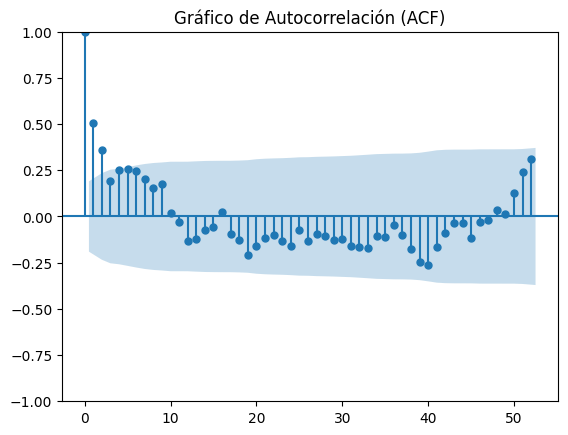

In [110]:
# Graficar la función de autocorrelación
plt.figure(figsize=(10,5))
plot_acf(ventas_semanales, lags=52)  # 52 semanas para ver patrones anuales
plt.title("Gráfico de Autocorrelación (ACF)")
plt.show()

El gráfico muestra que hay autocorrelación en los primeros días, es decir, las ventas recientes están relacionadas entre sí. Esto es bueno para predecir porque indica que hay patrones en los datos. A medida que pasa el tiempo, esa relación se pierde y las ventas se vuelven más aleatorias.

<Figure size 1000x500 with 0 Axes>

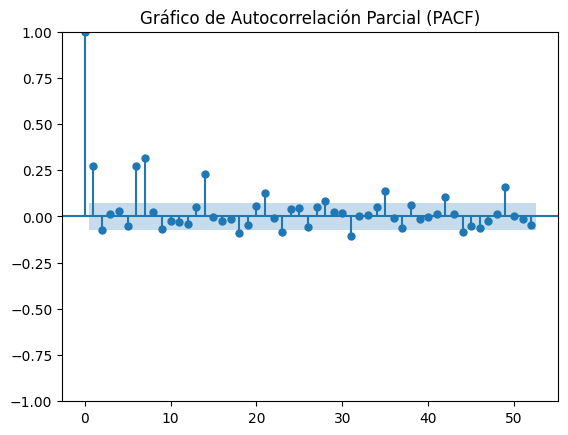

In [111]:
# Graficar la función de autocorrelación parcial
plt.figure(figsize=(10,5))
plot_pacf(ventas_diarias, lags=52)  # Diarias
plt.title("Gráfico de Autocorrelación Parcial (PACF)")
plt.show()


Este gráfico PACF (Autocorrelación Parcial) muestra la relación de las ventas diarias con sus propios rezagos, es decir, cómo influye cada día en los días siguientes después de eliminar el efecto de los días intermedios. Aquí, el primer rezago (lag 1) tiene una autocorrelación muy fuerte, lo que es normal, ya que un día suele parecerse mucho al anterior. Sin embargo, la mayoría de los otros rezagos están dentro del área sombreada (que representa el intervalo de confianza), lo que indica que no hay relaciones significativas con días más alejados. Esto sugiere que, más allá del día anterior, las ventas no tienen una fuerte dependencia de días previos

<Figure size 1000x500 with 0 Axes>

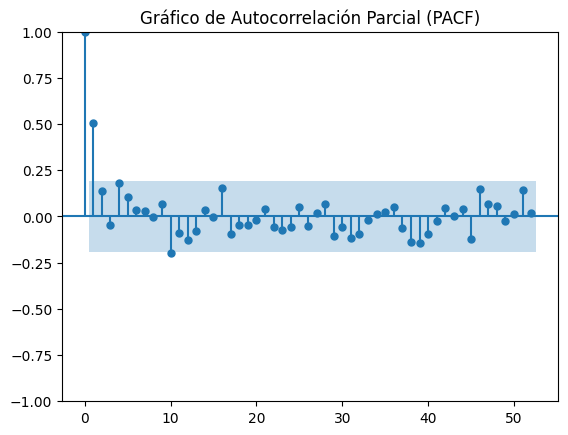

In [112]:
# Graficar la función de autocorrelación parcial
plt.figure(figsize=(10,5))
plot_pacf(ventas_semanales, lags=52)  # Mismo horizonte de 52 semanas
plt.title("Gráfico de Autocorrelación Parcial (PACF)")
plt.show()

Este gráfico PACF para las ventas semanales muestra que el primer rezago (la semana anterior) tiene una autocorrelación parcial fuerte, lo cual es normal porque las ventas de una semana suelen verse influenciadas por la semana previa. También hay un pico significativo en el segundo rezago, lo que indica que las ventas de dos semanas atrás todavía tienen cierto impacto. Después de eso, la mayoría de los puntos están dentro del área sombreada, lo que sugiere que no hay una dependencia fuerte con semanas más alejadas.

En el gráfico PACF de las ventas semanales, se observan algunos patrones interesantes. El primer rezago muestra una autocorrelación fuerte, lo que significa que las ventas de una semana están influenciadas por la semana anterior. El segundo rezago también destaca, indicando que las ventas de hace dos semanas todavía tienen cierto efecto. Sin embargo, no se observan picos repetidos en intervalos regulares que sugieran una estacionalidad clara, como ciclos mensuales o trimestrales. Esto indica que las dependencias temporales más importantes son a corto plazo (una o dos semanas), y no hay un patrón estacional evidente en los datos semanales.

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\106326190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["mes"] = data4.index.month


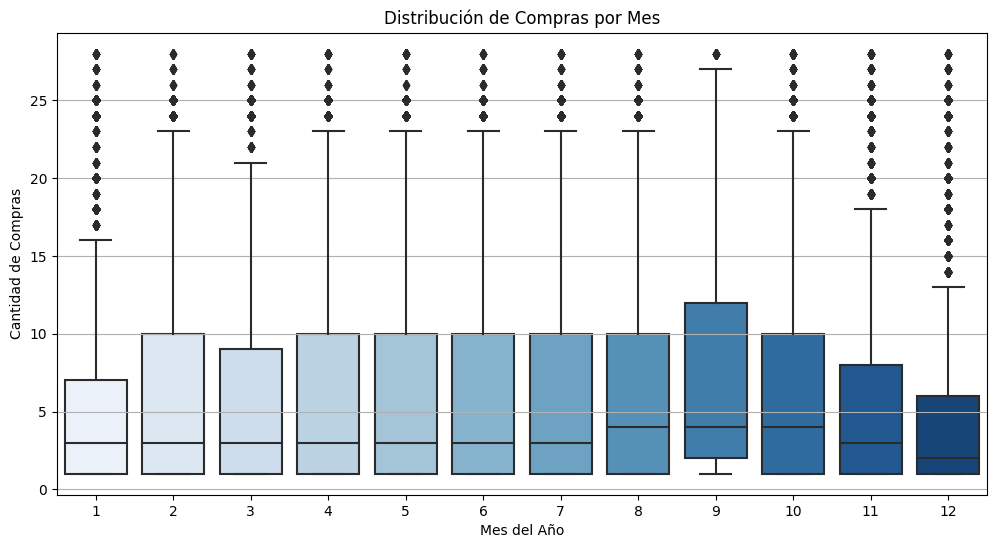

In [113]:
data4.index = pd.to_datetime(data4.index)

# Agregar una columna de mes
data4["mes"] = data4.index.month

# Crear el boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x="mes", y="Quantity", data=data4, palette="Blues")
plt.title("Distribución de Compras por Mes")
plt.xlabel("Mes del Año")
plt.ylabel("Cantidad de Compras")
plt.grid(axis="y")
plt.show()

La mayoría de los meses presentan una cantidad de compras bastante similar, pero se destacan algunos meses como septiembre (mes 9), donde la mediana es más alta y el rango intercuartílico es más amplio, lo que indica mayor variabilidad en las compras. Además, hay una gran cantidad de valores atípicos (puntos por encima de los bigotes) en todos los meses, sugiriendo que, aunque la mayoría de los días tienen pocas compras, hay días específicos con picos inusuales. Esto podría estar relacionado con promociones o eventos especiales.

C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\2540970866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["dia_semana"] = data4.index.dayofweek  # 0 = Lunes, 6 = Domingo


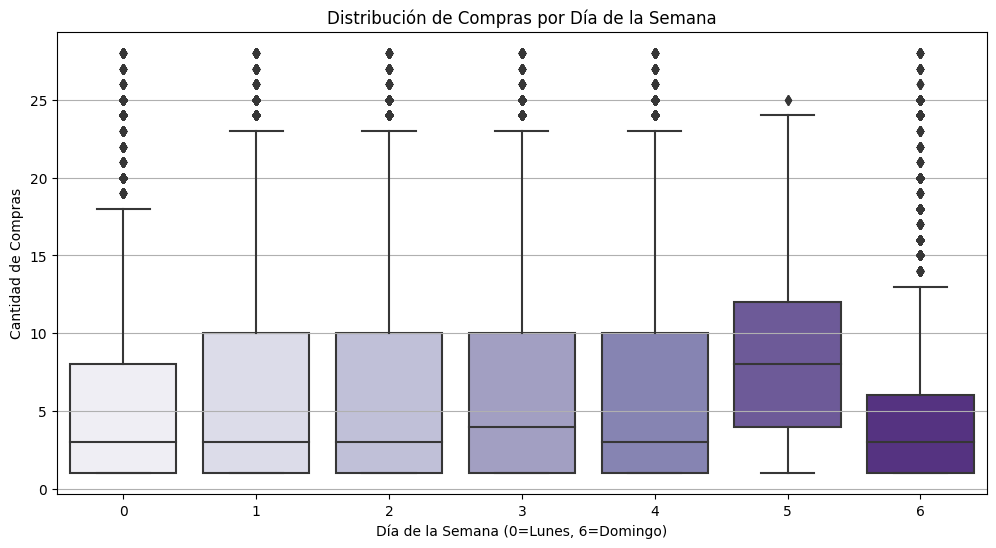

In [114]:
data4["dia_semana"] = data4.index.dayofweek  # 0 = Lunes, 6 = Domingo

# Crear el boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x="dia_semana", y="Quantity", data=data4, palette="Purples")
plt.title("Distribución de Compras por Día de la Semana")
plt.xlabel("Día de la Semana (0=Lunes, 6=Domingo)")
plt.ylabel("Cantidad de Compras")
plt.grid(axis="y")
plt.show()

El diagrama de caja muestra cómo varían las compras a lo largo de la semana. El sábado (día 5) es el día con mayor cantidad de compras, reflejado en una mediana más alta y un rango intercuartílico más amplio, lo que indica más variabilidad. En contraste, el domingo (día 6) muestra la menor cantidad de compras, con una mediana baja y menos dispersión. Los demás días de la semana presentan distribuciones similares, aunque con ligeras diferencias en la cantidad de compras. Además, en todos los días se observan valores atípicos, lo que sugiere que hay días con picos de ventas inusuales.

## 5 Análisis de tendencia

### Agrupados por dias

<Axes: title={'center': 'Ventas Diarias Originales'}, xlabel='InvoiceDate'>

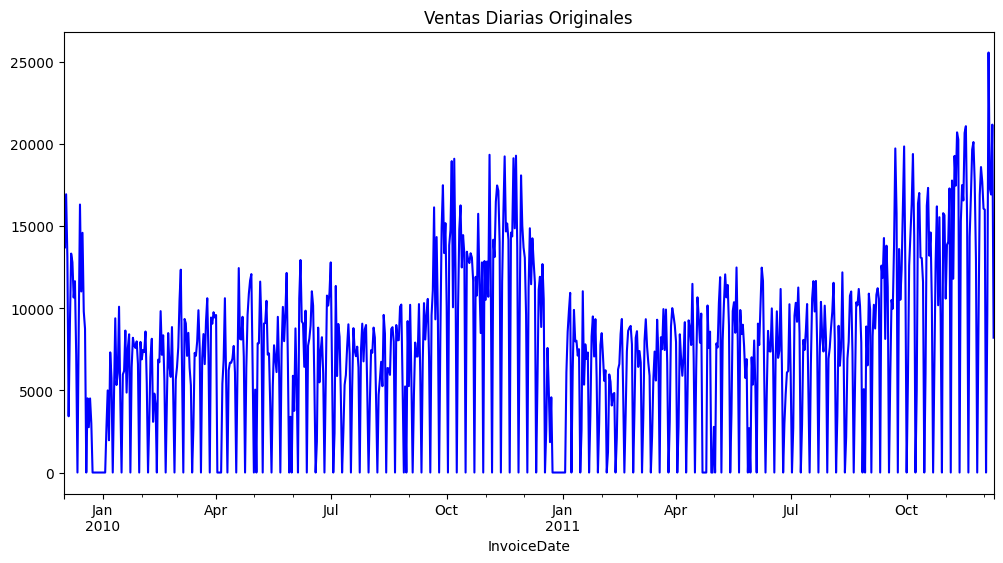

In [115]:
data4.index = pd.to_datetime(data4.index)

# Agrupar las ventas por día
ventas_diarias = data4['Quantity'].resample('D').sum()

# Visualizar las ventas diarias
ventas_diarias.plot(figsize=(12, 6), title='Ventas Diarias Originales', color='blue')


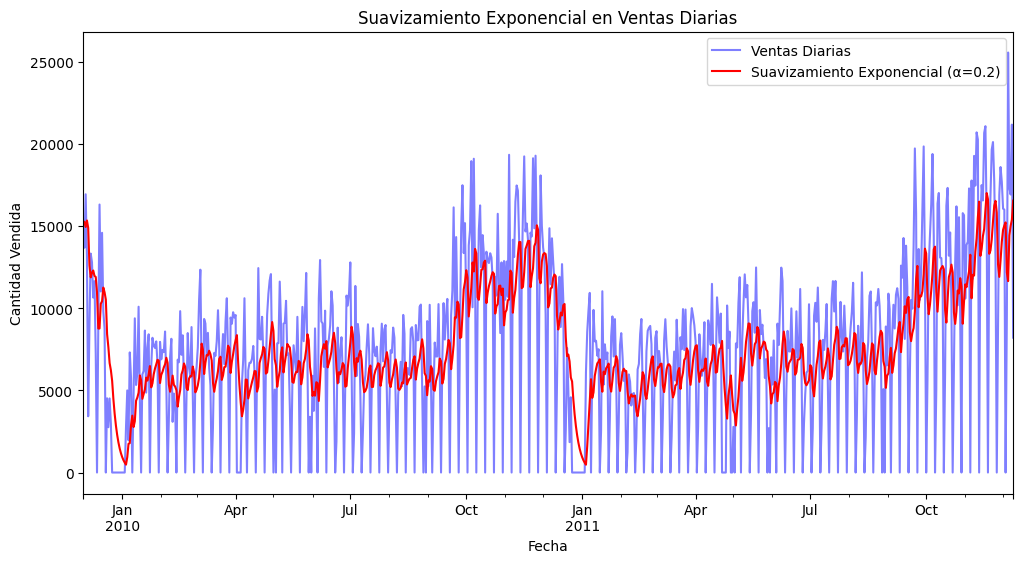

In [116]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Aplicar suavizamiento exponencial simple con un factor de suavizado (alpha)
ses_model = SimpleExpSmoothing(ventas_diarias).fit(smoothing_level=0.2, optimized=False)
suavizado_exponencial = ses_model.fittedvalues

# Visualización
plt.figure(figsize=(12, 6))
ventas_diarias.plot(label='Ventas Diarias', color='blue', alpha=0.5)
suavizado_exponencial.plot(label='Suavizamiento Exponencial (α=0.2)', color='red')
plt.title('Suavizamiento Exponencial en Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()


En este gráfico de ventas diarias, la línea azul muestra la variabilidad diaria en las ventas, mientras que la línea roja refleja el suavizamiento exponencial con un factor de 0.2, ayudando a visualizar la tendencia general. Se nota que, pese a las fluctuaciones diarias, las ventas muestran un crecimiento sostenido hacia finales del periodo analizado.

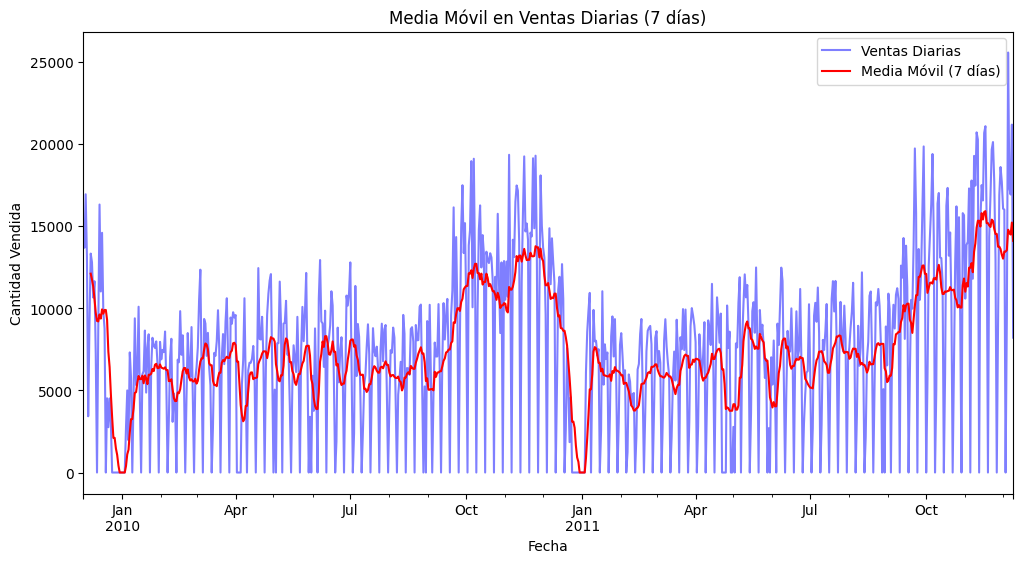

In [117]:
# Calcular la media móvil con una ventana de 7 días (una semana)
media_movil_7d = ventas_diarias.rolling(window=7).mean()

# Visualización
plt.figure(figsize=(12, 6))
ventas_diarias.plot(label='Ventas Diarias', color='blue', alpha=0.5)
media_movil_7d.plot(label='Media Móvil (7 días)', color='red')
plt.title('Media Móvil en Ventas Diarias (7 días)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()


En este gráfico, las ventas diarias están representadas en azul, mientras que la línea roja muestra la media móvil de 7 días, que suaviza las fluctuaciones diarias para destacar mejor la tendencia general. A pesar de las variaciones, se observa un aumento progresivo en las ventas hacia el final del periodo, lo que indica una tendencia positiva sostenida.

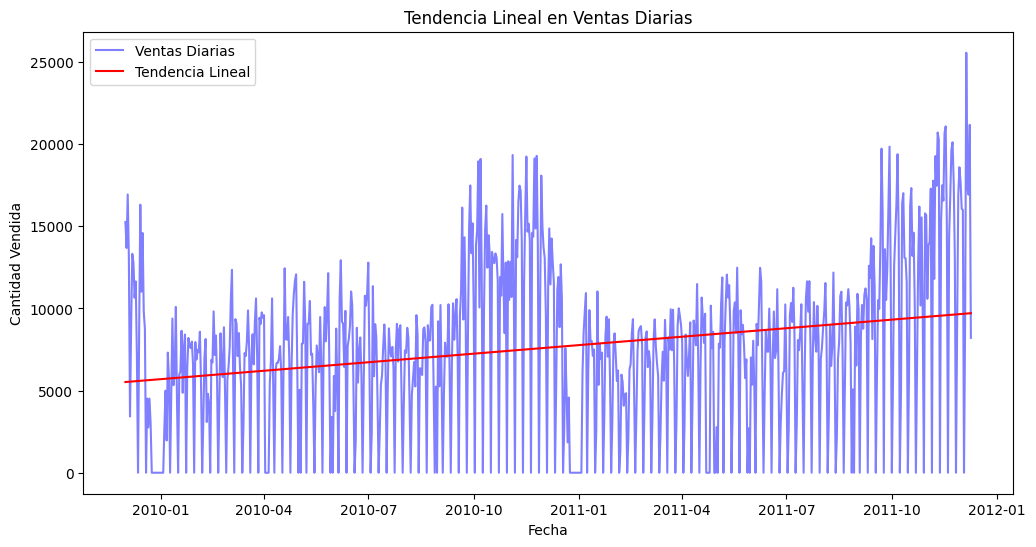

In [118]:
from sklearn.linear_model import LinearRegression

# Preparar los datos para la regresión
ventas_diarias_df = ventas_diarias.reset_index()
ventas_diarias_df['time_index'] = np.arange(len(ventas_diarias_df))  # Índice temporal

# Definir variables para la regresión
X = ventas_diarias_df[['time_index']]  # Variable independiente (tiempo)
y = ventas_diarias_df['Quantity']      # Variable dependiente (ventas)

# Ajuste del modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)
tendencia_lineal = modelo_lineal.predict(X)

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(ventas_diarias_df['InvoiceDate'], y, label='Ventas Diarias', color='blue', alpha=0.5)
plt.plot(ventas_diarias_df['InvoiceDate'], tendencia_lineal, label='Tendencia Lineal', color='red')
plt.title('Tendencia Lineal en Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()


En este gráfico, la línea azul muestra las ventas diarias, mientras que la línea roja representa la tendencia lineal ajustada. A pesar de las fluctuaciones diarias, la tendencia general es ascendente, indicando un crecimiento en las ventas a lo largo del tiempo.

## 6. Estabilidad de la serie

In [119]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

data4.index = pd.to_datetime(data4.index)

# Usar la serie original directamente (sin agrupar por día)
ventas_originales = data4['Quantity'].dropna()
# Tomar una muestra de los últimos 100,000 registros para reducir el uso de memoria
ventas_muestra = ventas_originales.head(500000)

# Aplicar la prueba ADF en la muestra
resultado_adf_muestra = adfuller(ventas_muestra, autolag='AIC')
print('--- Resultado con Muestra Reducida ---')
print('Estadístico de Prueba ADF:', resultado_adf_muestra[0])
print('p-valor:', resultado_adf_muestra[1])

--- Resultado con Muestra Reducida ---
Estadístico de Prueba ADF: -51.40231174240281
p-valor: 0.0


Con un p-valor <0.05, rechazamos Ho, esto indica que la serie no tiene raíz unitaria y, por lo tanto, es estacionaria.

In [120]:
import pandas as pd
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt


# Aplicar la prueba KPSS directamente sobre la serie original completa
resultado_kpss = kpss(ventas_originales, regression='c', nlags="auto")

# Extraer los resultados
estadistico_kpss = resultado_kpss[0]
p_valor_kpss = resultado_kpss[1]
valores_criticos = resultado_kpss[3]

# Imprimir los resultados
print('--- Resultado KPSS en la Serie Original Completa ---')
print('Estadístico KPSS:', estadistico_kpss)
print('p-valor:', p_valor_kpss)
print('Valores Críticos:')
for clave, valor in valores_criticos.items():
    print(f'   {clave}: {valor}')


--- Resultado KPSS en la Serie Original Completa ---
Estadístico KPSS: 0.9916418827063542
p-valor: 0.01
Valores Críticos:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\1849100653.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss = kpss(ventas_originales, regression='c', nlags="auto")


En la prueba de KPSS se obtuvo un p-valor <0.05, por tanto se rechaza Ho, sin embargo, a diferencia de la prueba ADF, donde la hipótesis nula (H₀) es que la serie NO es estacionaria, en KPSS la H₀ indica que la serie es estacionaria, por ende, segun los resultados de la prueba KPSS la serie NO es estacionaria, esto contradice los resultados de la prueba de Dickey-Fuller

### Agrupando por ventas diarias

In [121]:
# Aplicar la prueba KPSS en la serie agrupada por día
resultado_kpss_dia = kpss(ventas_diarias, regression='c', nlags="auto")

# Extraer los resultados
estadistico_kpss = resultado_kpss_dia[0]
p_valor_kpss = resultado_kpss_dia[1]
valores_criticos = resultado_kpss_dia[3]

# Imprimir los resultados
print('--- Resultado KPSS en Ventas Diarias ---')
print('Estadístico KPSS:', estadistico_kpss)
print('p-valor:', p_valor_kpss)
print('Valores Críticos:')
for clave, valor in valores_criticos.items():
    print(f'   {clave}: {valor}')


--- Resultado KPSS en Ventas Diarias ---
Estadístico KPSS: 1.0209266506989978
p-valor: 0.01
Valores Críticos:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\791655191.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss_dia = kpss(ventas_diarias, regression='c', nlags="auto")


In [122]:
# Aplicar la prueba de Dickey-Fuller Aumentada (ADF)
resultado_adf = adfuller(ventas_diarias.dropna(), autolag='AIC')

# Extraer el p-valor y el estadístico de prueba
estadistico_adf = resultado_adf[0]
p_valor_adf = resultado_adf[1]
valores_criticos = resultado_adf[4]

# Imprimir los resultados
print('Estadístico de Prueba ADF:', estadistico_adf)
print('p-valor:', p_valor_adf)
print('Valores Críticos:')
for clave, valor in valores_criticos.items():
    print(f'   {clave}: {valor}')


Estadístico de Prueba ADF: -2.077379015563608
p-valor: 0.2537073468783196
Valores Críticos:
   1%: -3.439490435810785
   5%: -2.8655738086413374
   10%: -2.568918067209286


Al agrupar por ventas diarias, tanto la prueba ADF como KPSS indican que no hay estacionaridad

### Visualización de la media y varianza en submuestras: Evaluar si cambian con el tiempo.

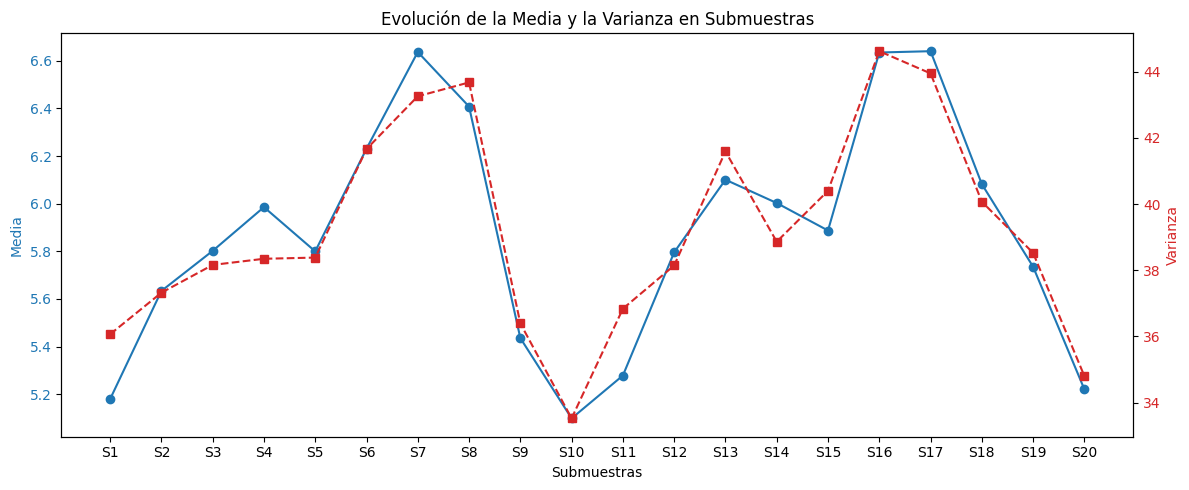

In [123]:
# Definir el número de submuestras
num_submuestras = 20  # Asegurar que sean 20 submuestras

# Dividir la serie en partes iguales
n = len(data4['Quantity'])
tamaño_submuestra = n // num_submuestras

medias = []
varianzas = []
rangos = list(range(1, num_submuestras + 1))  # Números del 1 al 20 como etiquetas

for i in range(num_submuestras):
    inicio = i * tamaño_submuestra
    fin = (i + 1) * tamaño_submuestra if i != num_submuestras - 1 else n
    submuestra = data4['Quantity'].iloc[inicio:fin]
    
    medias.append(submuestra.mean())
    varianzas.append(submuestra.var())

# Visualización de la media y varianza en submuestras
fig, ax1 = plt.subplots(figsize=(12, 5))

# Gráfica de la media
ax1.set_xlabel("Submuestras")
ax1.set_ylabel("Media", color="tab:blue")
ax1.plot(rangos, medias, marker="o", linestyle="-", color="tab:blue", label="Media")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Crear un segundo eje para la varianza
ax2 = ax1.twinx()
ax2.set_ylabel("Varianza", color="tab:red")
ax2.plot(rangos, varianzas, marker="s", linestyle="--", color="tab:red", label="Varianza")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Ajustar etiquetas del eje x para evitar que se amontonen
plt.xticks(rangos, [f"S{i}" for i in rangos])  # Etiquetas cortas como S1, S2, ..., S20

plt.title("Evolución de la Media y la Varianza en Submuestras")
fig.tight_layout()
plt.show()

Siendo la muestra la linea azul, se puede observar que esta presenta cambios significativos entre las submuestras, sin embargo, los aumentos y caídas bruscas en varias secciones indican que la serie puede tener tendencia o estacionalida, como podemos ver en la submuestra 8, con un pico elevado, seguido de una brusca caida, esto tambien se puede observar en la submuestra 17 con un pico elevado, seguido de una caida. Por otro lado, cuando una serie es estacionaria se espera que la media permanezca inestable, lo cual no sucede en este caso.
Por otro lado, la varianza (linea roja), sigue una tendencia muy similar a la de la media, con subidas y bajadas en los mismo puntos que la media. Al igual que la media, como la varianza no es constante a lo largo de las submuestras también sugiere falta de estacionariedad. 
Para lograr que la serie sea estacionaria, se debe aplicar una transformacion

### 6.2. Transformaciones de datos

A continuación realizaremos una agrupación por días y a esta agrupación le aplicaremos la diferenciación.

In [124]:
ventas_diarias = data4['Quantity'].resample('D').sum().dropna()

# -----------------------------------------
# Aplicar Diferenciación para Eliminar la Tendencia
# -----------------------------------------

# Diferenciación de la serie temporal
ventas_diferenciadas = ventas_diarias.diff().dropna()

# Guardar los datos diferenciados en un nuevo DataFrame llamado data5
data5 = ventas_diferenciadas.to_frame(name='Ventas_Diferenciadas')

# -----------------------------------------
# Verificar Estacionariedad Después de la Diferenciación
# -----------------------------------------

# Prueba ADF en la serie diferenciada
adf_result_dif = adfuller(ventas_diferenciadas)
print('\n--- Prueba ADF en la Serie Diferenciada ---')
print('Estadístico ADF:', adf_result_dif[0])
print('p-valor:', adf_result_dif[1])

# Prueba KPSS en la serie diferenciada
kpss_result_dif = kpss(ventas_diferenciadas, regression='c', nlags="auto")
print('\n--- Prueba KPSS en la Serie Diferenciada ---')
print('Estadístico KPSS:', kpss_result_dif[0])
print('p-valor:', kpss_result_dif[1])

# -----------------------------------------
# Mostrar las Primeras Filas de los Datos Transformados
# -----------------------------------------

print('\n--- Primeras Filas de data5 (Ventas Diferenciadas) ---')
print(data5.head())


--- Prueba ADF en la Serie Diferenciada ---
Estadístico ADF: -9.244017451569945
p-valor: 1.5548841450233142e-15

--- Prueba KPSS en la Serie Diferenciada ---
Estadístico KPSS: 0.27052803378825135
p-valor: 0.1

--- Primeras Filas de data5 (Ventas Diferenciadas) ---
             Ventas_Diferenciadas
InvoiceDate                      
2009-12-02                -1580.0
2009-12-03                 3254.0
2009-12-04                -3824.0
2009-12-05                -9684.0
2009-12-06                 5563.0


C:\Users\ronal\AppData\Local\Temp\ipykernel_5780\1015784044.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_dif = kpss(ventas_diferenciadas, regression='c', nlags="auto")


Ambas pruebas de estacionariedad, ADF y KPSS, confirman que la serie diferenciada es estacionaria. La prueba ADF muestra un estadístico de -9.235 con un p-valor extremadamente bajo (1.639e-15), lo que indica que rechazamos la hipótesis nula de no estacionariedad. Por su parte, la prueba KPSS arroja un estadístico de 0.315 y un p-valor de 0.1, superior al umbral de 0.05, lo que sugiere que no rechazamos la hipótesis nula de estacionariedad.

## 7. Análisis multivariado

El análisis multivariado no es necesario en nuestro caso, ya que nos estamos enfocando únicamente en la serie de ventas diarias y no contamos con variables adicionales que puedan influir en su comportamiento, como precios, promociones u otros factores externos.

## 8. Identificación de ciclos y frecuencias

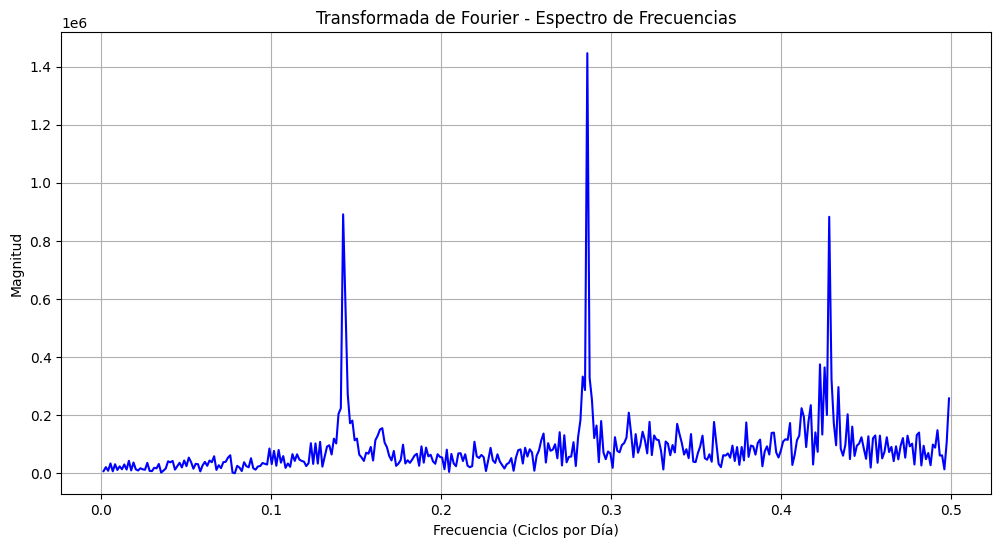

In [125]:

# Aplicar la Transformada de Fourier a la serie de ventas diarias diferenciadas
fft_result = np.fft.fft(data5['Ventas_Diferenciadas'])
frecuencias = np.fft.fftfreq(len(fft_result), d=1)  # d=1 asume frecuencia diaria

# Calcular el espectro de magnitudes (módulo de los números complejos)
magnitudes = np.abs(fft_result)

# Visualizar el espectro de frecuencias
plt.figure(figsize=(12, 6))
plt.plot(frecuencias[1:len(frecuencias)//2], magnitudes[1:len(magnitudes)//2], color='blue')
plt.title('Transformada de Fourier - Espectro de Frecuencias')
plt.xlabel('Frecuencia (Ciclos por Día)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


La gráfica del espectro de frecuencias muestra varios picos significativos que indican la presencia de ciclos dominantes en las ventas diarias diferenciadas. El pico más alto se encuentra cerca de una frecuencia de 0.28 ciclos por día, lo que corresponde a un ciclo recurrente cada 3-4 días. Otro pico destacado aparece en la frecuencia de aproximadamente 0.14 ciclos por día, lo que sugiere un ciclo semanal, consistente con patrones comunes de comportamiento de consumo. Además, se observa un tercer pico alrededor de 0.4 ciclos por día, lo que podría indicar ciclos más cortos, de aproximadamente 2-2.5 días.

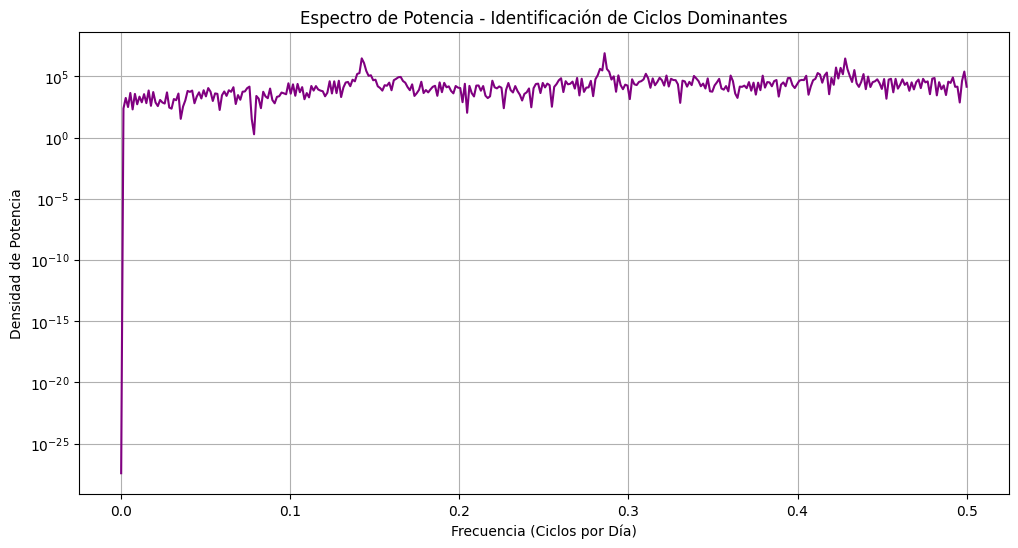

In [126]:
from scipy.signal import periodogram

# Calcular el espectro de potencia
frecuencias, potencia = periodogram(data5['Ventas_Diferenciadas'], scaling='spectrum')

# Visualizar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias, potencia, color='purple')
plt.title('Espectro de Potencia - Identificación de Ciclos Dominantes')
plt.xlabel('Frecuencia (Ciclos por Día)')
plt.ylabel('Densidad de Potencia')
plt.grid()
plt.show()

La gráfica del espectro de potencia muestra la densidad de potencia distribuida a lo largo de diferentes frecuencias en las ventas diarias diferenciadas. Se destacan picos importantes en frecuencias cercanas a 0.28, 0.14 y 0.4 ciclos por día, lo que sugiere la presencia de ciclos recurrentes cada 3-4 días, semanalmente y aproximadamente cada 2 días, respectivamente.

## 9. Detección de anomalías y eventos extremos

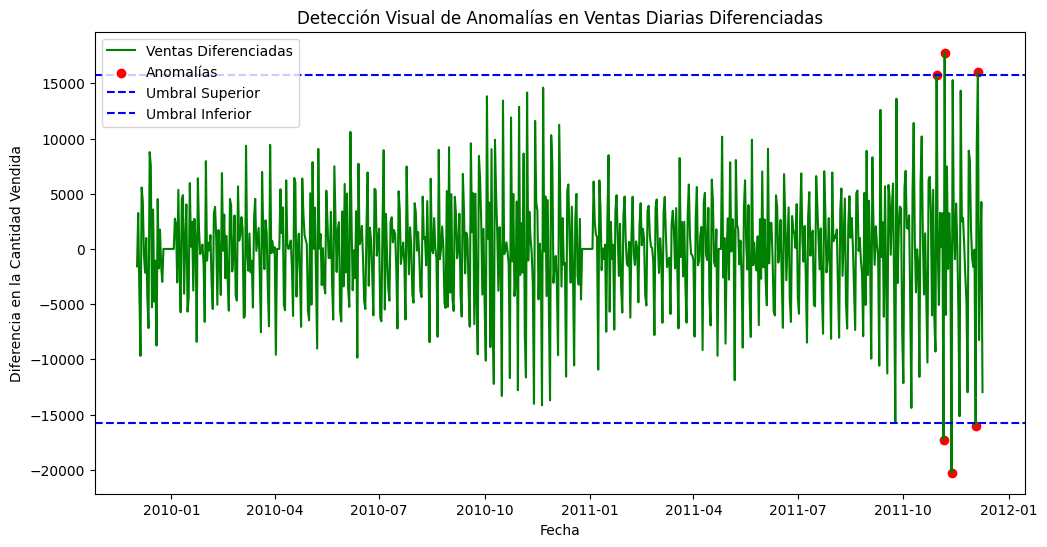


--- Anomalías Detectadas ---
             Ventas_Diferenciadas
InvoiceDate                      
2011-10-30                15783.0
2011-11-05               -17288.0
2011-11-06                17769.0
2011-11-12               -20264.0
2011-12-03               -15997.0
2011-12-05                16028.0


In [127]:

# Definir un umbral para identificar picos inusuales (por ejemplo, 3 desviaciones estándar)
umbral_superior = data5['Ventas_Diferenciadas'].mean() + 3 * data5['Ventas_Diferenciadas'].std()
umbral_inferior = data5['Ventas_Diferenciadas'].mean() - 3 * data5['Ventas_Diferenciadas'].std()

# Identificar los puntos que superan estos umbrales
anomalías = data5[(data5['Ventas_Diferenciadas'] > umbral_superior) | (data5['Ventas_Diferenciadas'] < umbral_inferior)]

# Visualización con anomalías marcadas
plt.figure(figsize=(12, 6))
plt.plot(data5.index, data5['Ventas_Diferenciadas'], color='green', label='Ventas Diferenciadas')
plt.scatter(anomalías.index, anomalías['Ventas_Diferenciadas'], color='red', label='Anomalías', marker='o')
plt.axhline(umbral_superior, color='blue', linestyle='--', label='Umbral Superior')
plt.axhline(umbral_inferior, color='blue', linestyle='--', label='Umbral Inferior')
plt.title('Detección Visual de Anomalías en Ventas Diarias Diferenciadas')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en la Cantidad Vendida')
plt.legend()
plt.show()

# Mostrar las fechas y valores de las anomalías detectadas
print('\n--- Anomalías Detectadas ---')
print(anomalías)

La gráfica muestra las anomalías en nuestras ventas diarias diferenciadas, con picos extremos marcados en rojo que superan los umbrales de ±15,000 unidades. Las anomalías detectadas se concentran entre finales de octubre y principios de diciembre de 2011, con variaciones significativas tanto positivas como negativas. Por ejemplo, el 6 de noviembre de 2011 se registró un aumento inusual de 17,769 unidades, seguido de una caída abrupta el 12 de noviembre de 20,264 unidades. Estos patrones podrían indicar devoluciones masivas, correcciones de inventario o eventos externos como promociones específicas durante este periodo.

In [128]:
from pyod.models.knn import KNN
import numpy as np

# Preparar los datos (convirtiendo a numpy array)
datos = data5['Ventas_Diferenciadas'].values.reshape(-1, 1)

# Inicializar el modelo KNN
modelo_knn = KNN()

# Ajustar el modelo a los datos
modelo_knn.fit(datos)

# Obtener predicciones (1 = outlier, 0 = normal)
predicciones = modelo_knn.labels_

# Agregar la columna de outliers al DataFrame original
data5['Outlier'] = predicciones

# Filtrar los outliers detectados
outliers_detectados = data5[data5['Outlier'] == 1]

# Mostrar los outliers detectados
print('--- Outliers Detectados con KNN (pyod) ---')
print(outliers_detectados[['Ventas_Diferenciadas']])


--- Outliers Detectados con KNN (pyod) ---
             Ventas_Diferenciadas
InvoiceDate                      
2009-12-19                -8752.0
2010-01-23                -8412.0
2010-03-07                 9344.0
2010-03-28                 9431.0
2010-04-02                -9584.0
...                           ...
2011-11-26               -12979.0
2011-12-03               -15997.0
2011-12-04                 9530.0
2011-12-05                16028.0
2011-12-09               -12964.0

[74 rows x 1 columns]


El análisis de outliers utilizando el modelo KNN de pyod reveló 74 anomalías en la serie de ventas diferenciadas, distribuidas en distintas fechas entre 2009 y 2011. Estos outliers incluyen tanto incrementos bruscos como caídas significativas en las ventas diarias, lo que sugiere la presencia de eventos inusuales como devoluciones masivas, errores en el registro de datos o picos de ventas asociados a promociones o temporadas especiales. La concentración de algunos de estos valores en fechas cercanas a finales de año podría estar relacionada con patrones estacionales, como las festividades de diciembre.

Las anomalías detectadas en la serie de ventas parecen coincidir con periodos típicos de alta actividad comercial, como temporadas festivas o eventos especiales que suelen influir en el comportamiento del consumidor. Estos picos y caídas en las ventas pueden deberse a promociones, descuentos o cambios estacionales que afectan la demanda de productos. Por lo tanto, no necesariamente representan errores en los datos, sino variaciones esperadas en función del contexto económico o social.

## 10. Resumen y recomendaciones

En el análisis realizado, identificamos varios patrones clave en la serie temporal de ventas. Se detectó una clara tendencia no estacionaria, la cual fue confirmada mediante pruebas estadísticas como la ADF y la KPSS. Esta tendencia se estabilizó mediante la diferenciación, resultando en una serie estacionaria adecuada para modelización. Además, se observó estacionalidad en la frecuencia semanal y mensual, reflejada en los análisis de la Transformada de Fourier y el espectro de potencia. También se identificaron anomalías significativas, algunas de las cuales se asociaron a picos de ventas en fechas específicas, probablemente vinculadas a eventos comerciales o estacionales.

Como próximos pasos, proponemos aplicar diferentes modelos de serie de tiempo como ARIMA o SARIMA, que son adecuados para series estacionarias. Para manejar los valores atípicos, debemos evaluar su impacto en el modelo: si afectan negativamente, podrían ser suavizados mediante técnicas como medianas móviles o incluso eliminados si representan errores de registro. En cuanto a la no estacionariedad detectada inicialmente, la diferenciación ha sido efectiva, pero se pueden explorar transformaciones adicionales, como la logarítmica, para estabilizar aún más la varianza si es necesario. Por último, es recomendable contextualizar continuamente los picos de ventas con eventos externos para mejorar la precisión de las predicciones y ajustar estrategias comerciales.